In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border
from PIL import Image

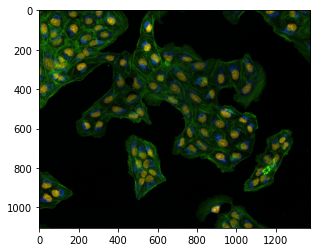

In [2]:
img = cv2.imread('../raw_data/watershed/SimpleExample/Osteosarcoma_01.tif')
plt.imshow(img);

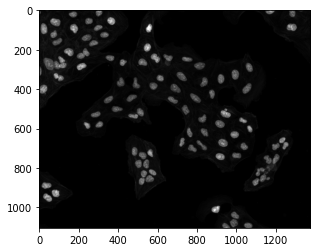

In [3]:
#blue channel, image equivalent to grey image
cell = img[:,:,0]
plt.imshow(cell, cmap='gray');

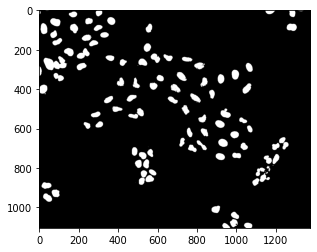

In [4]:
ret1, thresh = cv2.threshold(cell, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

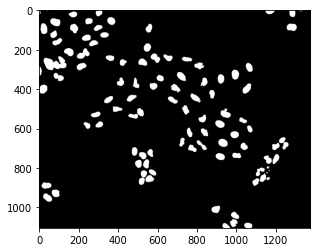

In [5]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

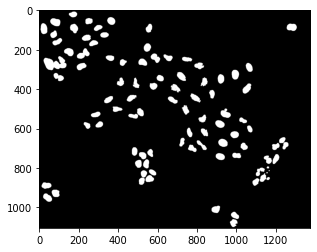

In [6]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

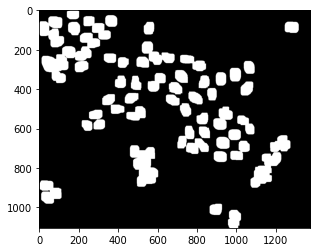

In [7]:
sure_backg = cv2.dilate(opening, kernel, iterations=10)
plt.imshow(sure_backg, cmap='gray');

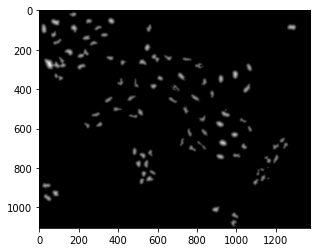

In [8]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray');

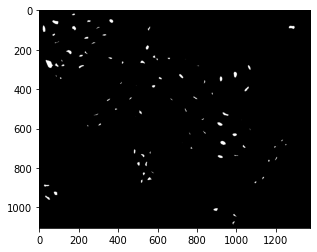

In [9]:
dtf_max = dist_transform.max()
ret2, sure_foreg = cv2.threshold(dist_transform, 0.5*dtf_max, 255, 0)
plt.imshow(sure_foreg, cmap='gray');

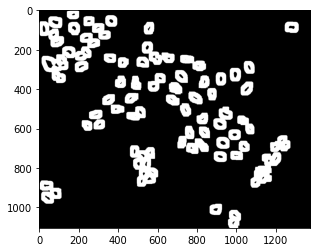

In [10]:
sure_foreg = np.uint8(sure_foreg)
unknown = cv2.subtract(sure_backg,sure_foreg)
plt.imshow(unknown, cmap='gray');

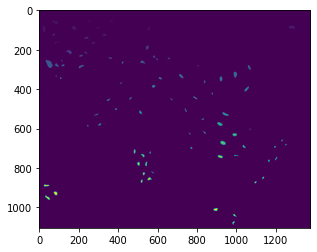

In [11]:
ret3, markers = cv2.connectedComponents(sure_foreg)
plt.imshow(markers);

In [12]:
markers = markers+10

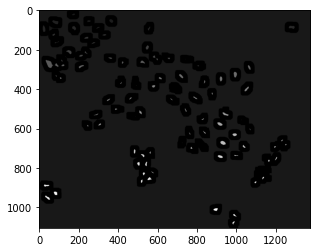

In [13]:
markers[unknown == 255] = 0
plt.imshow(markers, cmap='gray');

In [14]:
markers = cv2.watershed(img,markers)

In [15]:
img[markers == -1] = [0,255,255]

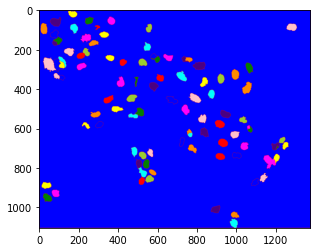

In [16]:
img2 = color.label2rgb(markers, bg_label=0)
plt.imshow(img2);

Label: 10 Area: 1400327


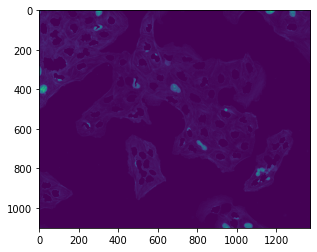

Label: 11 Area: 1092


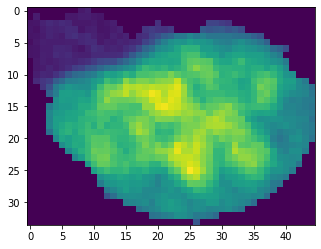

Label: 12 Area: 1142


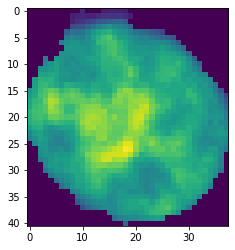

Label: 13 Area: 1108


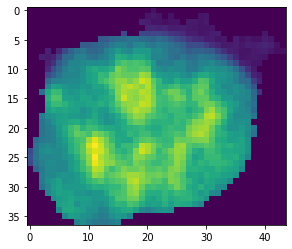

Label: 14 Area: 1670


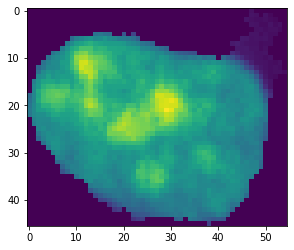

Label: 15 Area: 1480


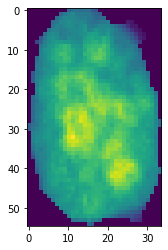

Label: 16 Area: 1312


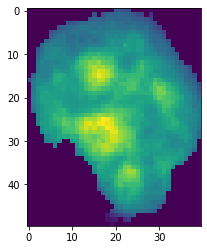

Label: 17 Area: 1442


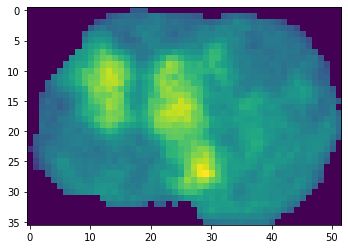

Label: 18 Area: 940


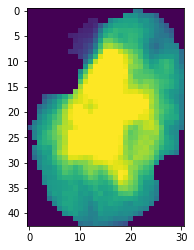

Label: 19 Area: 262


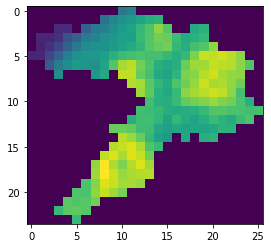

Label: 20 Area: 1180


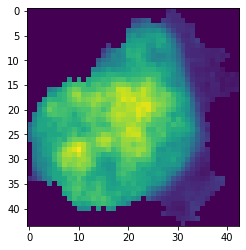

Label: 21 Area: 1061


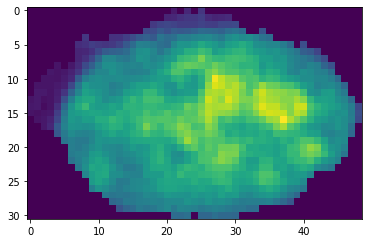

Label: 22 Area: 1418


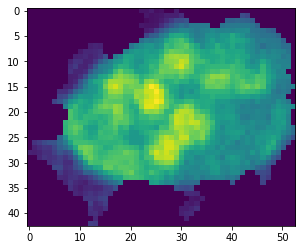

Label: 23 Area: 895


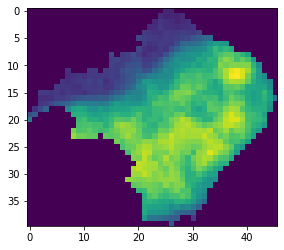

Label: 24 Area: 399


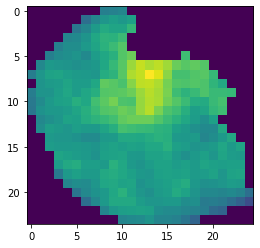

Label: 25 Area: 948


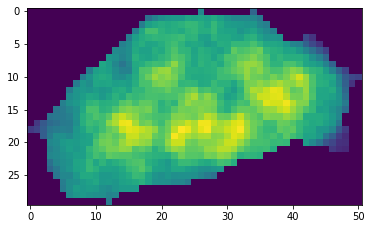

Label: 26 Area: 1080


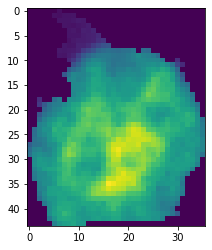

Label: 27 Area: 1417


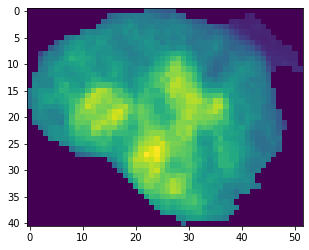

Label: 28 Area: 922


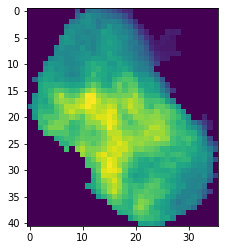

Label: 29 Area: 941


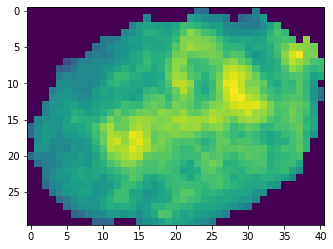

Label: 30 Area: 540


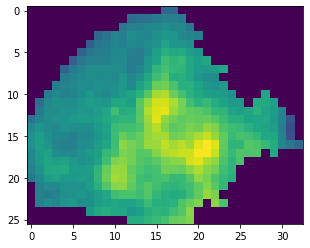

Label: 31 Area: 971


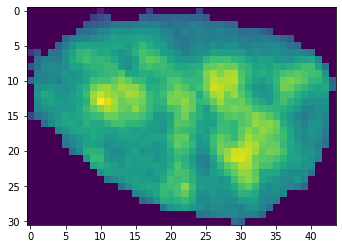

Label: 32 Area: 1072


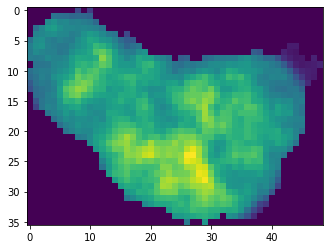

Label: 33 Area: 643


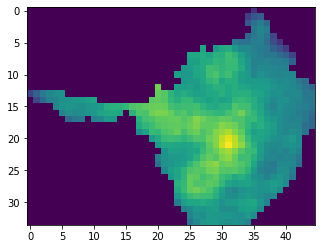

Label: 34 Area: 425


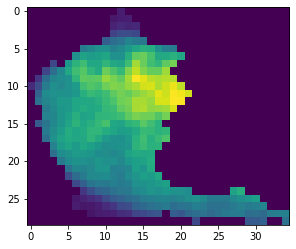

Label: 35 Area: 593


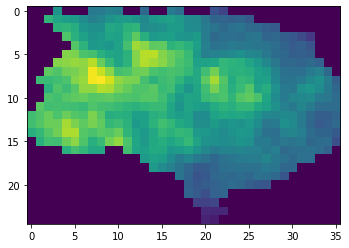

Label: 36 Area: 844


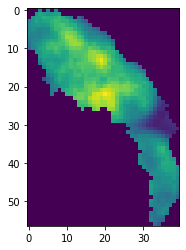

Label: 37 Area: 2838


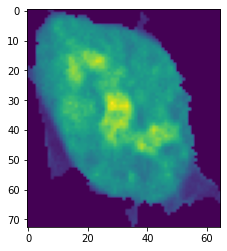

Label: 38 Area: 1212


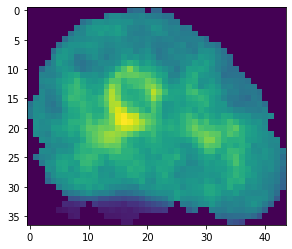

Label: 39 Area: 854


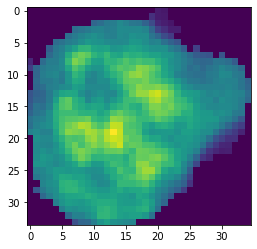

Label: 40 Area: 1546


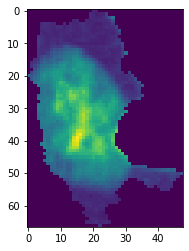

Label: 41 Area: 703


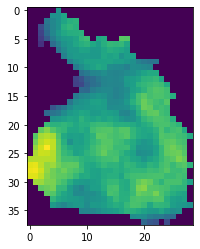

Label: 42 Area: 1178


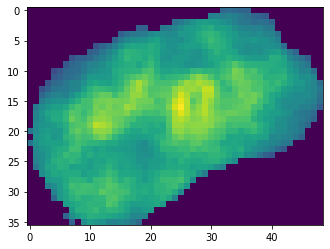

Label: 43 Area: 1310


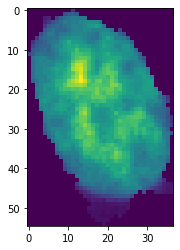

Label: 44 Area: 1744


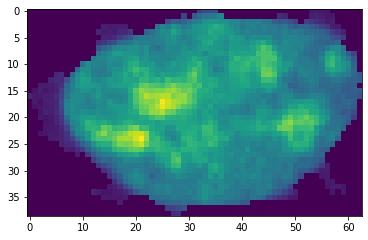

Label: 45 Area: 1514


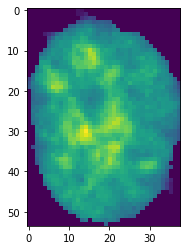

Label: 46 Area: 1651


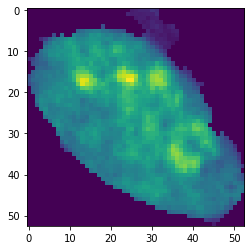

Label: 47 Area: 587


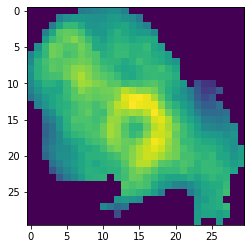

Label: 48 Area: 1277


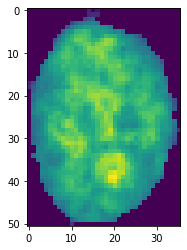

Label: 49 Area: 952


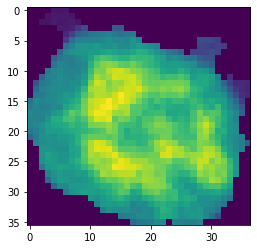

Label: 50 Area: 477


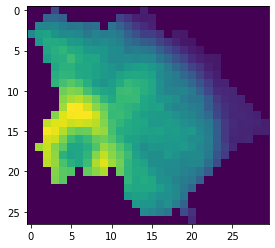

Label: 51 Area: 1178


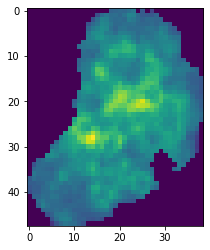

Label: 52 Area: 1370


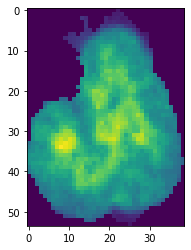

Label: 53 Area: 406


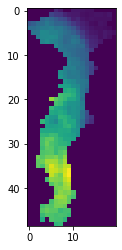

Label: 54 Area: 1247


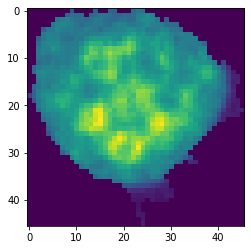

Label: 55 Area: 1856


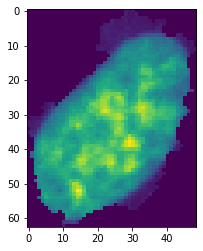

Label: 56 Area: 1129


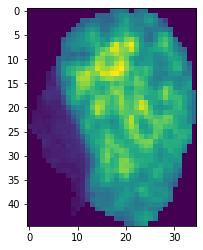

Label: 57 Area: 1748


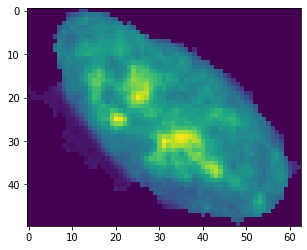

Label: 58 Area: 1401


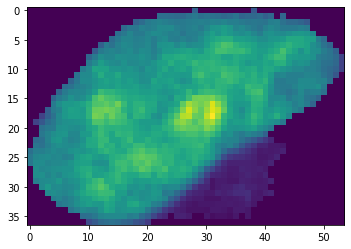

Label: 59 Area: 1227


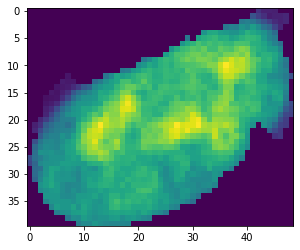

Label: 60 Area: 1276


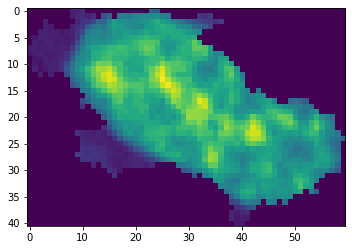

Label: 61 Area: 1192


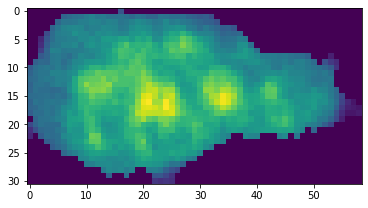

Label: 62 Area: 1357


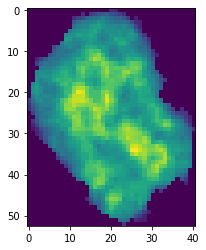

Label: 63 Area: 1257


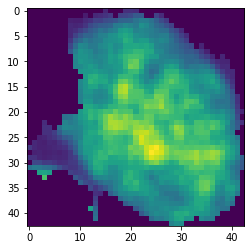

Label: 64 Area: 1326


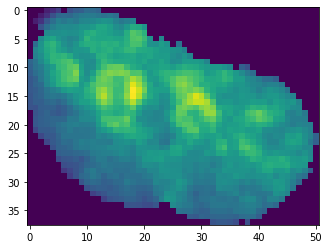

Label: 65 Area: 1068


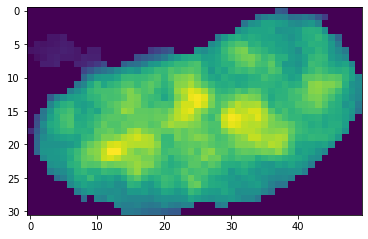

Label: 66 Area: 836


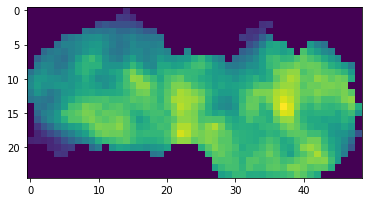

Label: 67 Area: 1274


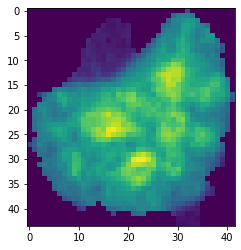

Label: 68 Area: 869


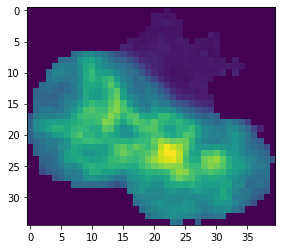

Label: 69 Area: 1410


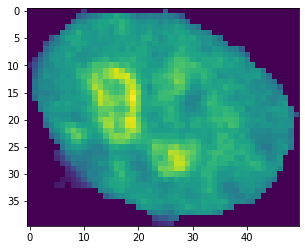

Label: 70 Area: 870


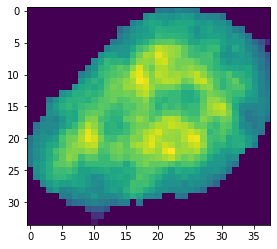

Label: 71 Area: 653


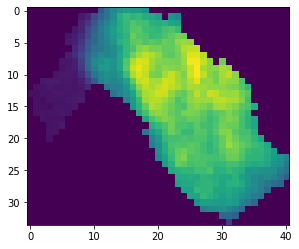

Label: 72 Area: 202


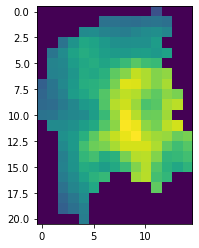

Label: 73 Area: 413


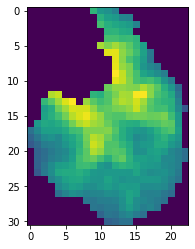

Label: 74 Area: 1216


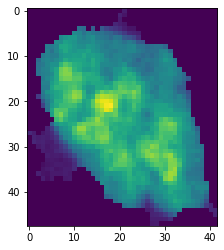

Label: 75 Area: 328


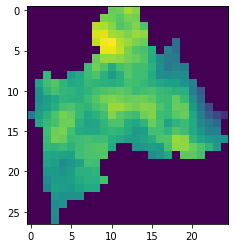

Label: 76 Area: 401


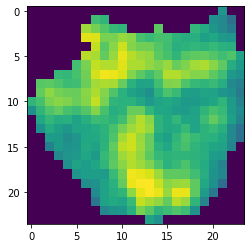

Label: 77 Area: 1219


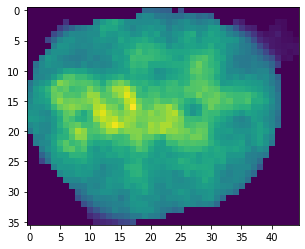

Label: 78 Area: 698


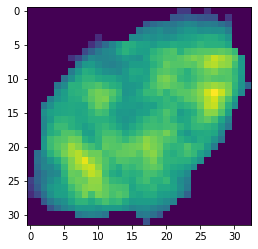

Label: 79 Area: 1484


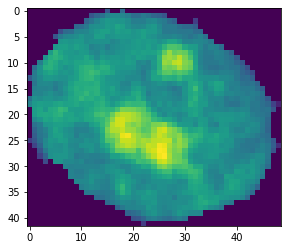

Label: 80 Area: 760


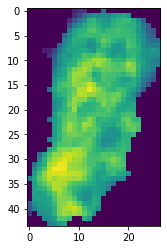

Label: 81 Area: 764


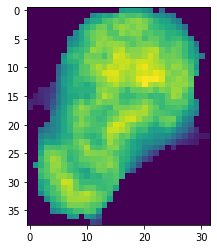

Label: 82 Area: 1171


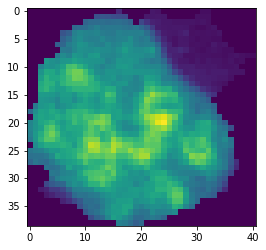

Label: 83 Area: 83


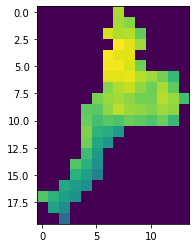

Label: 84 Area: 857


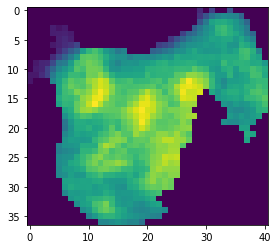

Label: 85 Area: 1068


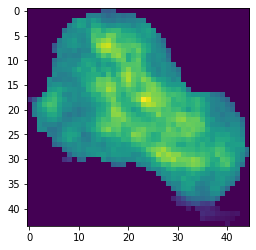

Label: 86 Area: 1076


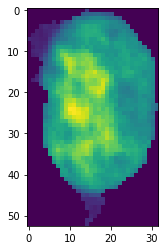

Label: 87 Area: 804


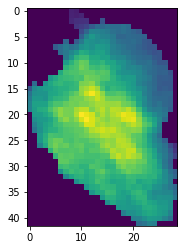

Label: 88 Area: 1042


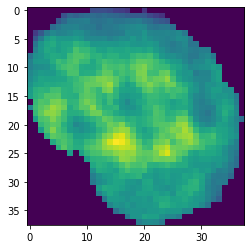

Label: 89 Area: 1177


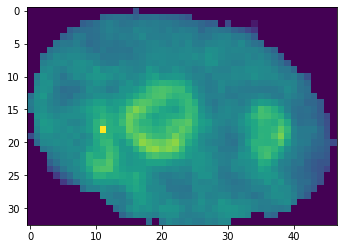

Label: 90 Area: 1017


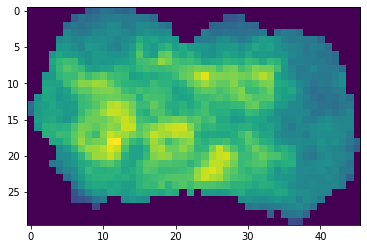

Label: 91 Area: 855


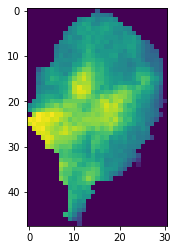

Label: 92 Area: 2215


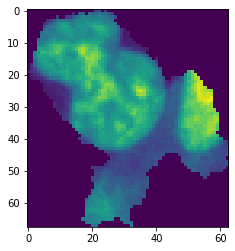

Label: 93 Area: 1118


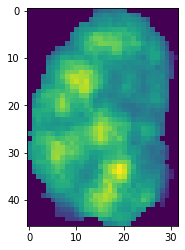

Label: 94 Area: 920


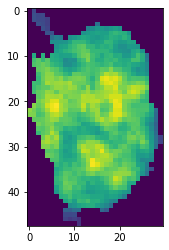

Label: 95 Area: 734


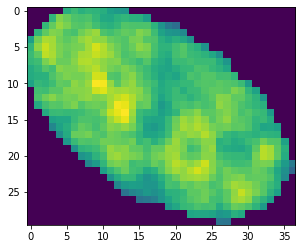

Label: 96 Area: 1183


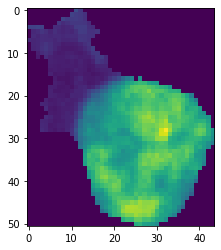

Label: 97 Area: 927


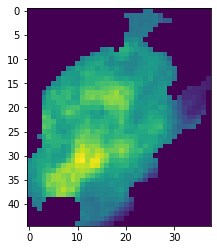

Label: 98 Area: 1133


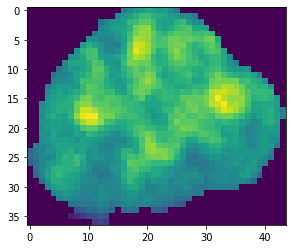

Label: 99 Area: 846


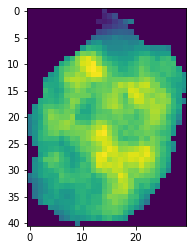

Label: 100 Area: 881


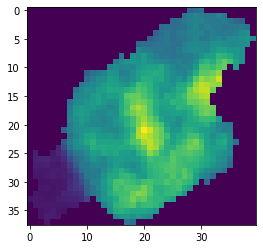

Label: 101 Area: 1200


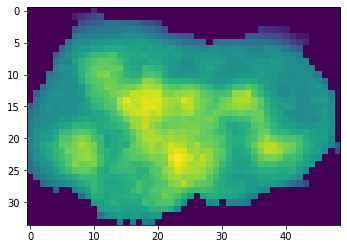

Label: 102 Area: 1100


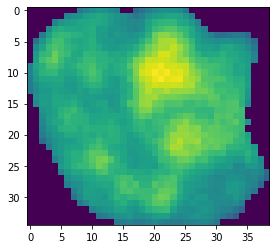

Label: 103 Area: 1279


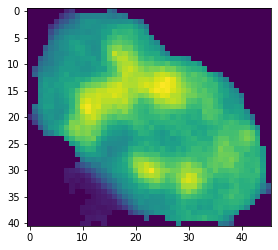

Label: 104 Area: 1179


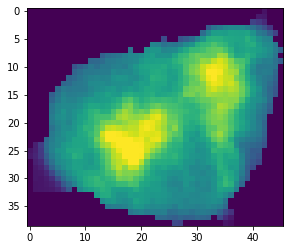

Label: 105 Area: 880


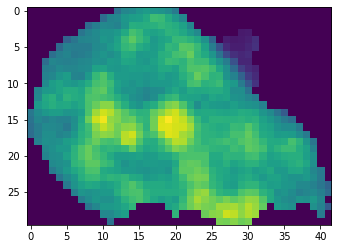

Label: 106 Area: 1287


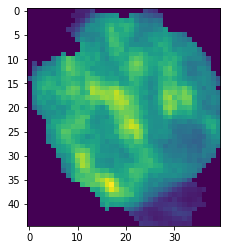

In [19]:
# extract properties of detected cells
# regionprops function in skimage measure module calculates useful parameters for each object
regions = measure.regionprops(markers, intensity_image=cell)


for prop in regions:
    print('Label: {} Area: {}'.format(prop.label, prop.area))    
    plt.imshow(prop.intensity_image)
    plt.show();

